<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [6]:
features = ['CRIM', 'RM', 'AGE']
X = X[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_hat = lm.predict(X_test)

In [11]:
import sklearn.metrics as skm

In [12]:
X_test.shape

(253, 3)

In [13]:
y_test.shape

(253,)

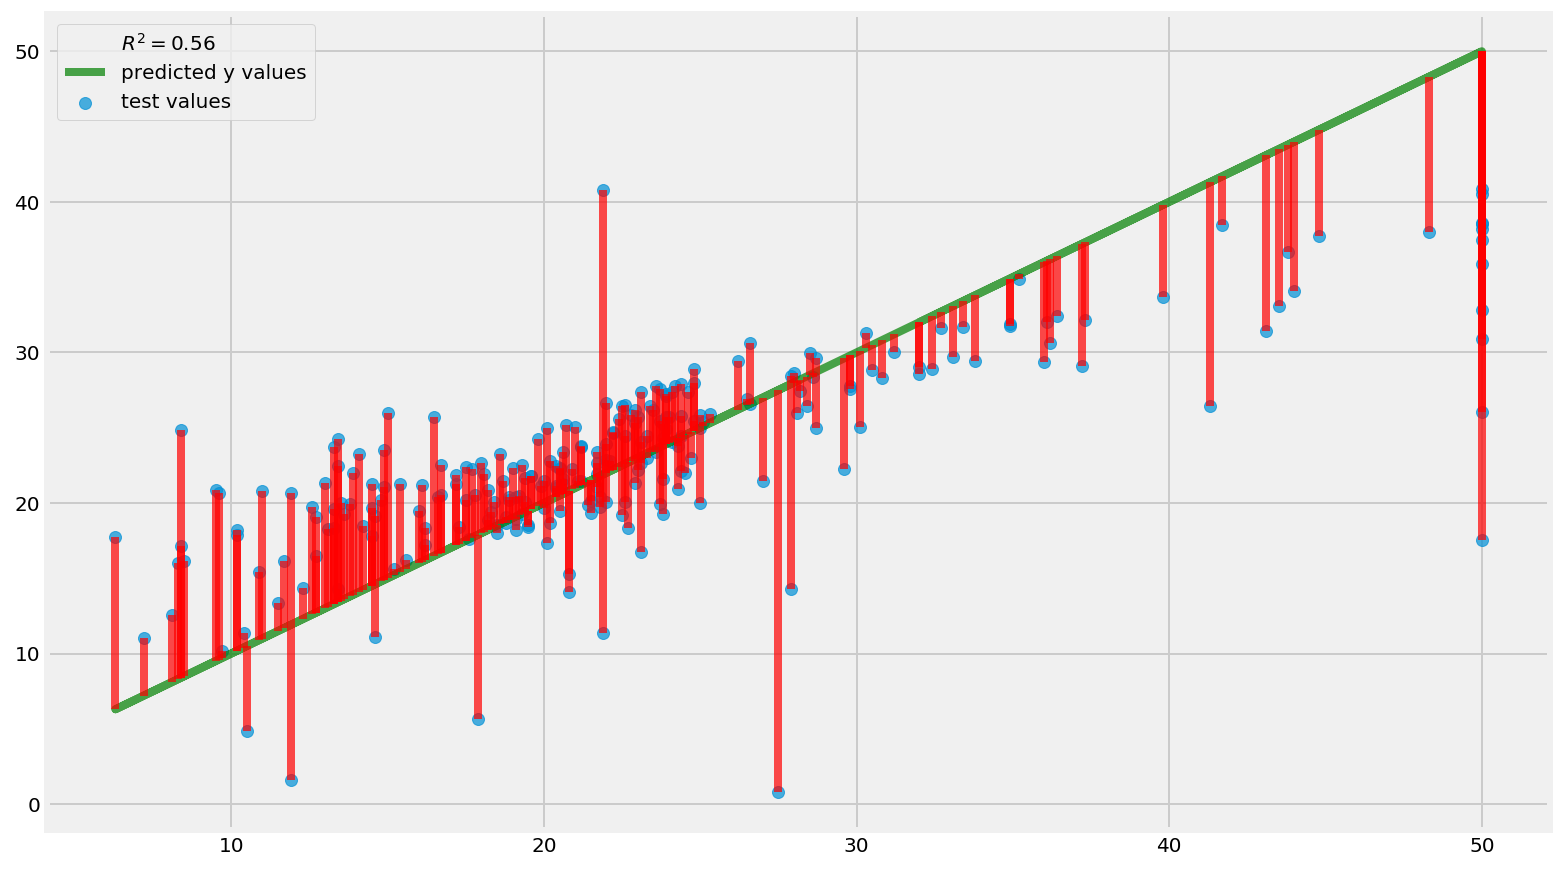

In [14]:
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.plot([], [], ' ', label=r'$R^2 = $' +
        f'{round(skm.r2_score(y_test, y_hat), 2)}')
ax.scatter(y_test, y_hat, alpha=0.7, label='test values')
ax.plot(y_test, y_test, color='g', alpha=0.7, label='predicted y values')
ax.legend()

for i, yy in enumerate(y_hat):
    ax.plot([y_test[i], y_test[i]], [yy, y_test[i]], color='r', alpha=0.7)

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_hat = lm.predict(X_test)

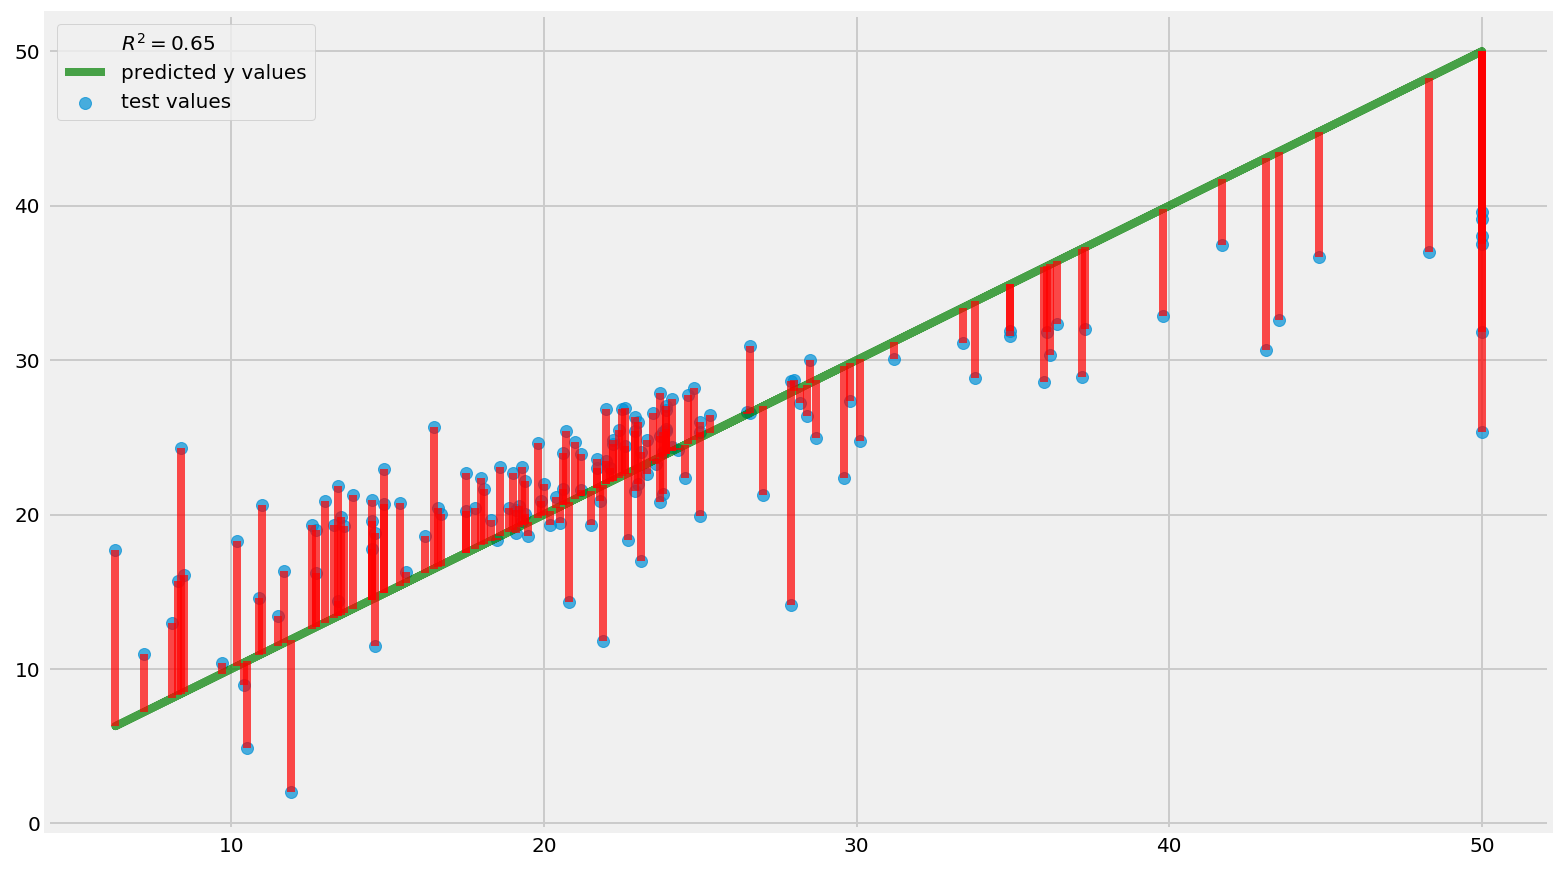

In [18]:
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.plot([], [], ' ', label=r'$R^2 = $' +
        f'{round(skm.r2_score(y_test, y_hat), 2)}')
ax.scatter(y_test, y_hat, alpha=0.7, label='test values')
ax.plot(y_test, y_test, color='g', alpha=0.7, label='predicted y values')
ax.legend()

for i, yy in enumerate(y_hat):
    ax.plot([y_test[i], y_test[i]], [yy, y_test[i]], color='r', alpha=0.7)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_hat = lm.predict(X_test)

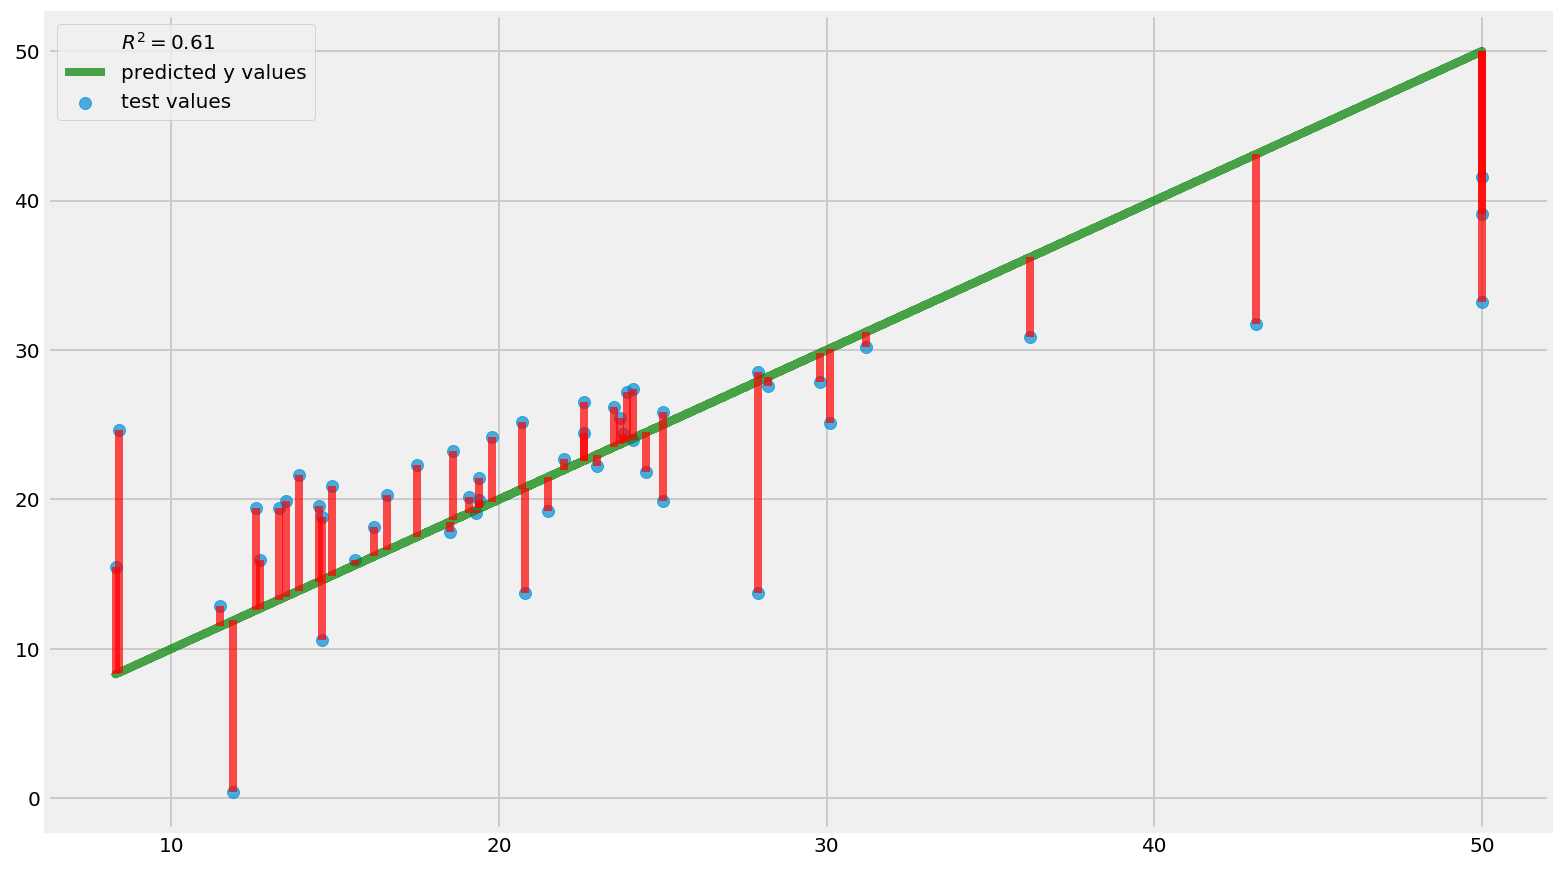

In [22]:
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.plot([], [], ' ', label=r'$R^2 = $' +
        f'{round(skm.r2_score(y_test, y_hat), 2)}')
ax.scatter(y_test, y_hat, alpha=0.7, label='test values')
ax.plot(y_test, y_test, color='g', alpha=0.7, label='predicted y values')
ax.legend()

for i, yy in enumerate(y_hat):
    ax.plot([y_test[i], y_test[i]], [yy, y_test[i]], color='r', alpha=0.7)

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [23]:
import sklearn.model_selection as skms

In [24]:
skms.cross_val_score(LinearRegression(), X_train, y_train, cv=5)

array([0.67415578, 0.20973692, 0.67167726, 0.46327615, 0.58264523])

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [25]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [26]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [27]:
import patsy

# A: